In [35]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [36]:
df = pd.read_csv("Melbourne_housing_FULL.csv")   #veri setinin kopyasını alıyoruz.
df_copy = df.copy()
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


# EDA (Exploratory Data Analysis)

In [ ]:
df_copy.info()    # Verimiz float, int. ve objectlerden oluşuyor. Yani numerik ve kategorik değerler var.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:


print(f'Shape     : {df_copy.shape}\n'
      f'Size      : {df_copy.size}\n'
      f'Dimension : {df_copy.ndim}')


Shape     : (34857, 21)
Size      : 731997
Dimension : 2


In [46]:
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
df_copy.duplicated().sum()

1

In [ ]:
df_copy.loc[df_copy.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.40,3131.00,3.00,3.00,2.00,405.00,226.00,2000.00,Manningham City Council,-37.83,145.17,Eastern Metropolitan,4973.00
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.40,3131.00,3.00,3.00,2.00,405.00,226.00,2000.00,Manningham City Council,-37.83,145.17,Eastern Metropolitan,4973.00


In [ ]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.00,3.03,0.97,1.00,2.00,3.00,4.00,16.00
Price,27247.00,1050173.34,641467.13,85000.00,635000.00,870000.00,1295000.00,11200000.00
Distance,34856.00,11.18,6.79,0.00,6.40,10.30,14.00,48.10
Postcode,34856.00,3116.06,109.02,3000.00,3051.00,3103.00,3156.00,3978.00
Bedroom2,26640.00,3.08,0.98,0.00,2.00,3.00,4.00,30.00
Bathroom,26631.00,1.62,0.72,0.00,1.00,2.00,2.00,12.00
Car,26129.00,1.73,1.01,0.00,1.00,2.00,2.00,26.00
Landsize,23047.00,593.60,3398.84,0.00,224.00,521.00,670.00,433014.00
BuildingArea,13742.00,160.26,401.27,0.00,102.00,136.00,188.00,44515.00
YearBuilt,15551.00,1965.29,37.33,1196.00,1940.00,1970.00,2000.00,2106.00


In [37]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [47]:
cat_cols = ['Type', 'Method','Regionname']
num_cols = ['Suburb', 'Address', 'Rooms', 'Price', 'SellerG', 'Date', 'Distance', 'Postcode', ' Bedroom2','Bathroom', 'Car', 'Landsize', 'BuildingArea',
            'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Propertycount']

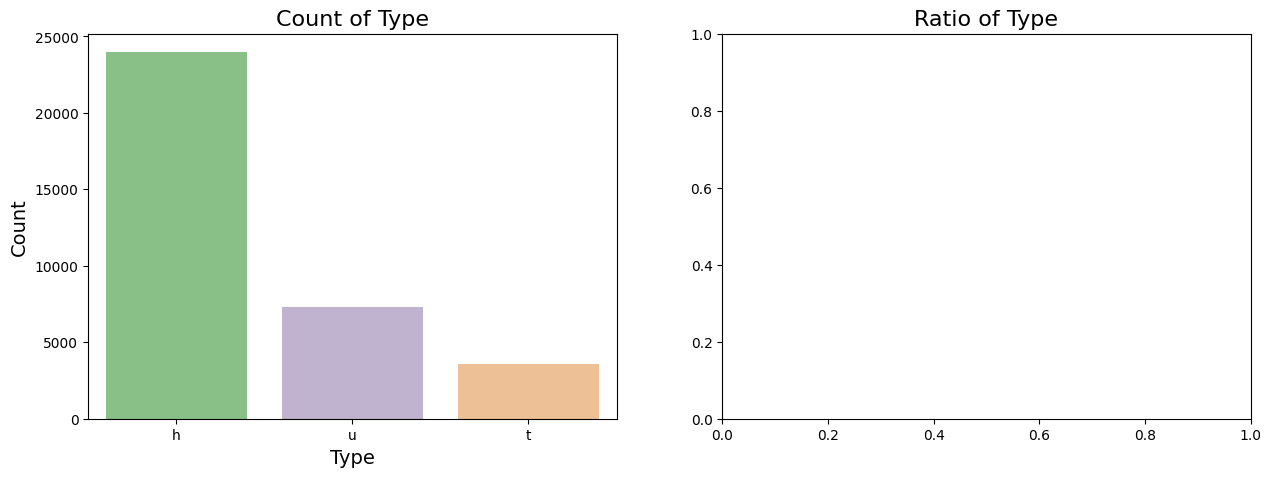

In [48]:
palette_color = sns.color_palette('Accent')

fig, axs = plt.subplots(1,2, figsize = (15, 5))
ax = sns.countplot(data=df_copy,
                   x=df_copy['Type'],
                   ax = axs[0],
                   palette='Accent');

ax.set_xlabel('Type', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
axs[0].set_title("Count of Type", fontsize=16)


axs[1].set_title("Ratio of Type", fontsize=16);

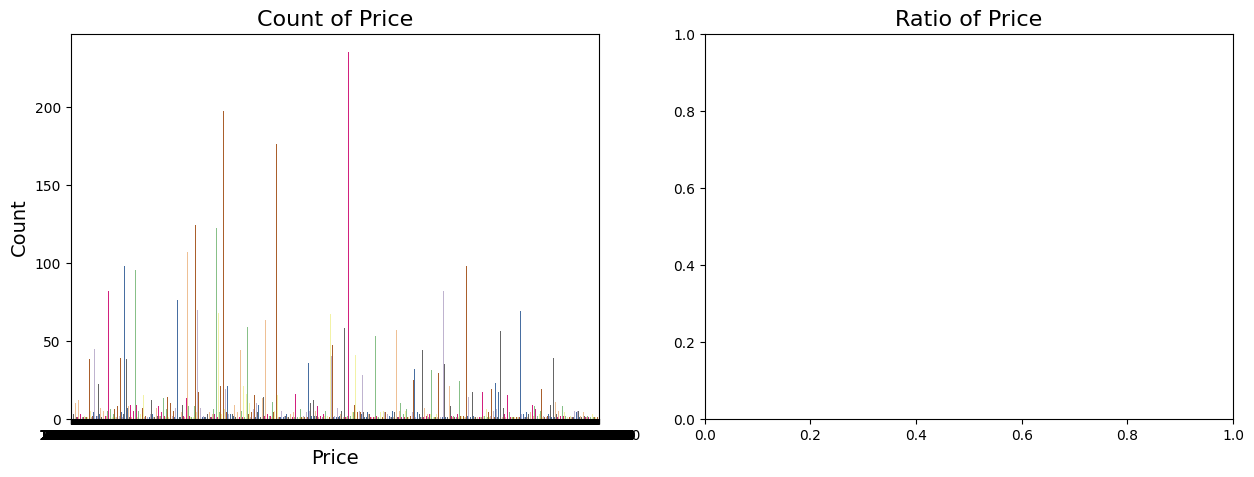

In [49]:
palette_color = sns.color_palette('Accent')

fig, axs = plt.subplots(1,2, figsize = (15, 5))
ax = sns.countplot(data=df_copy,
                   x=df_copy['Price'],
                   ax = axs[0],
                   palette='Accent');

ax.set_xlabel('Price', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
axs[0].set_title("Count of Price", fontsize=16)


axs[1].set_title("Ratio of Price", fontsize=16);

In [32]:
ax = df_copy['output'].value_counts().plot.pie(explode=[0,0.07],
                                               colors=["#81b7d2", "#ffcce7"],
                                               autopct='%.2f%%',
                                               figsize=(15, 5))
ax.set_title('Method');

KeyError: ignored

In [ ]:
fbs_count = df['fbs'].value_counts()
plt.figure(figsize=(15,5))
plt.bar(fbs_count.index, fbs_count.values, color=["#E2D1F9", "#317773"])
plt.title('Fasting Blood Sugar Distribution')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Number of Patients')
plt.xticks(fbs_count.index)
plt.show()

<ipython-input-50-30f9207d3f41>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


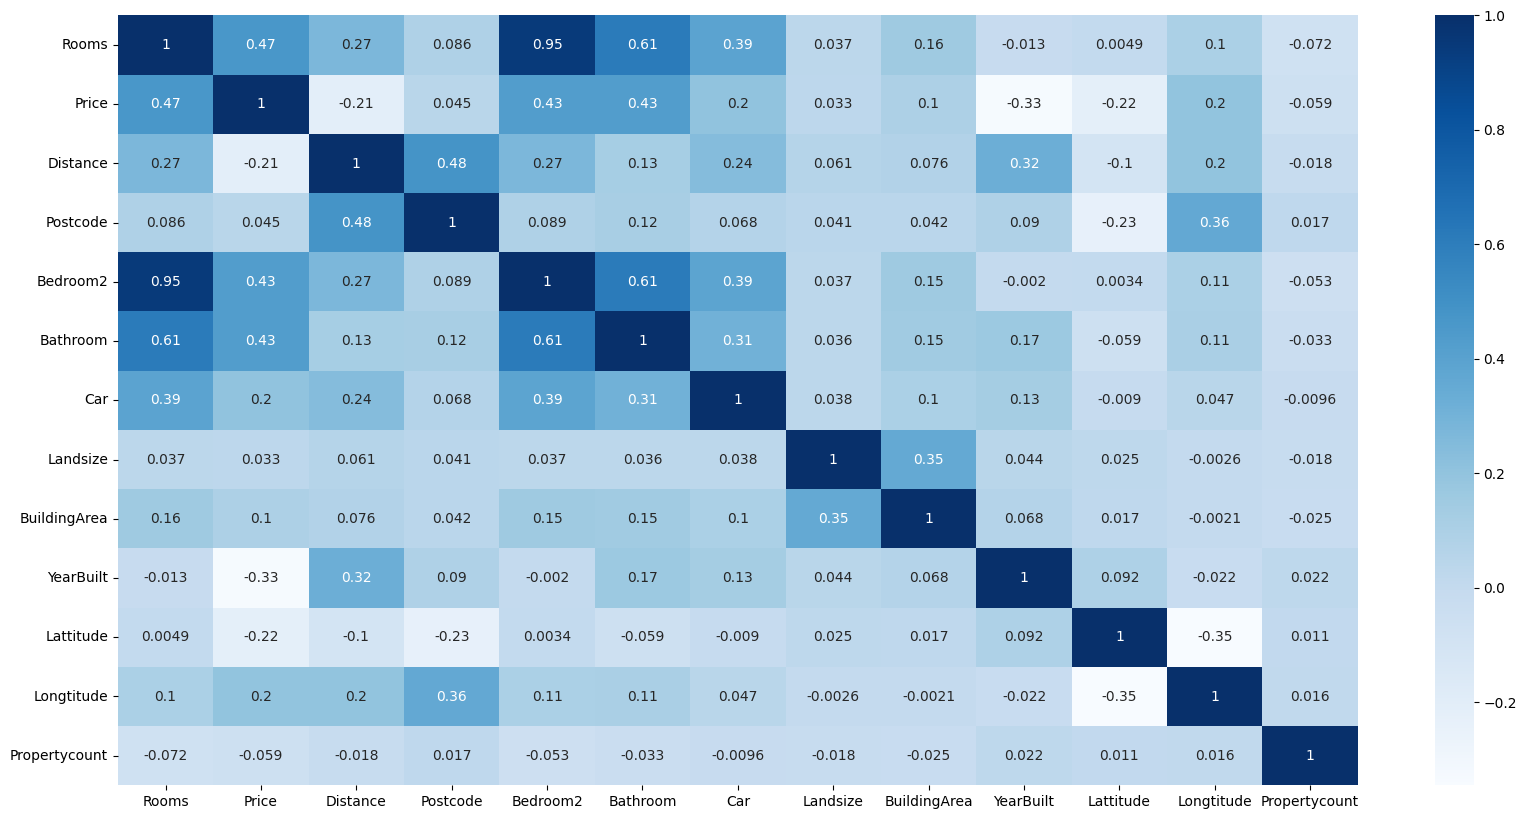

In [50]:

corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True);



In [51]:
print(pd.concat([df_copy.isnull().sum(), df_copy.isnull().sum()/len(df_copy)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))

               Number of Missing Values  Ratio of Missing Values
Suburb                                0                     0.00
Address                               0                     0.00
Rooms                                 0                     0.00
Type                                  0                     0.00
Price                              7610                    21.83
Method                                0                     0.00
SellerG                               0                     0.00
Date                                  0                     0.00
Distance                              1                     0.00
Postcode                              1                     0.00
Bedroom2                           8217                    23.57
Bathroom                           8226                    23.60
Car                                8728                    25.04
Landsize                          11810                    33.88
BuildingArea             

In [58]:
colomns_with_na_dropped = df_copy.dropna(axis=1)
colomns_with_na_dropped.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/09/2016
1,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016
2,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016
3,Abbotsford,18/659 Victoria St,3,u,VB,Rounds,4/02/2016
4,Abbotsford,5 Charles St,3,h,SP,Biggin,4/03/2017


In [64]:
subset_df_copy = df_copy.loc[:, 'Type':'Price'].head()
subset_df_copy

,Type,Price
0,h,NaN
1,h,1480000.00
2,h,1035000.00
3,u,NaN
4,h,1465000.00


In [65]:
subset_df_copy.fillna(0)

,Type,Price
0,h,0.00
1,h,1480000.00
2,h,1035000.00
3,u,0.00
4,h,1465000.00
